# Analisador de Impacto Ambiental

### Importações

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Dados

In [2]:
df_impacto = pd.read_csv("dados_impacto_ambiental.csv")
df_impacto.head()

,emissao_co2,consumo_energia,volume_residuos,impacto_ambiental
0,218.543053,1942.210793,19.114464,70.143118
1,477.821438,1572.752364,194.559019,92.037281
2,379.397274,1885.047989,101.163235,85.464068
3,319.396318,1800.171966,157.485500,79.880135
4,120.208388,1236.009960,273.194277,76.124260


### Distribuição do Impacto

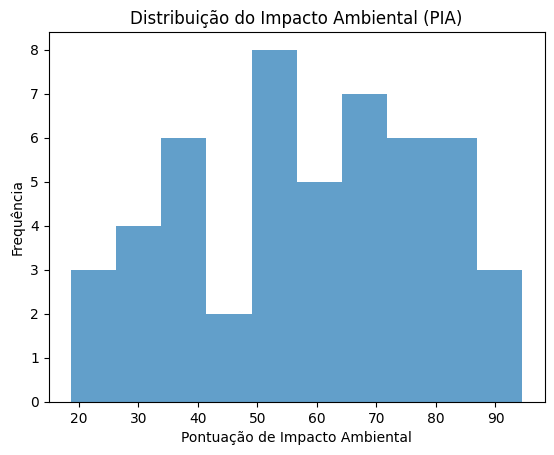

In [3]:
plt.hist(df_impacto["impacto_ambiental"], bins=10, alpha=0.7)
plt.title("Distribuição do Impacto Ambiental (PIA)")
plt.xlabel("Pontuação de Impacto Ambiental")
plt.ylabel("Frequência")
plt.show()

### Pré-Processamento

In [4]:
X = df_impacto[["emissao_co2", "consumo_energia", "volume_residuos"]]
y = df_impacto["impacto_ambiental"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo

In [5]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

### Avaliação

In [6]:
score = modelo.score(X_teste, y_teste)
print(f"Acurácia (R²) no conjunto de teste: {score:.2f}")

Acurácia (R²) no conjunto de teste: 0.97


### Uso do Modelo

In [ ]:
emissao_ex = 350
energia_ex = 920
residuos_ex = 70

X_novo = pd.DataFrame([[emissao_ex, energia_ex, residuos_ex]],
                       columns=["emissao_co2", "consumo_energia", "volume_residuos"])
impacto_calculado = modelo.predict(X_novo)[0]

print(f"\nImpacto Ambiental estimado para o produto (CO2={emissao_ex}, Energia={energia_ex}, "
      f"Resíduos={residuos_ex}): {impacto_calculado:.2f} (escala 0 a 100)")


Impacto Ambiental estimado para o produto (CO2=250, Energia=1000, Resíduos=50): 47.33 (escala 0 a 100)
